## In the name of God
## Artificial Neural Network
## Kohonen Self Organizing Map Implementaion
## Teacher: Dr. Vasighi
## Teaching Asisstant: Mrs. Moghadam
## Reza Khaleghi
## Sarina Danaei

Importing required packages and libraries

In [1]:
# The only package required to implement the method
import numpy as np

# Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### INPUTS

> Here you can set the parameters as you want
<br>`n` as number of neurons
<br>`epoch` how many epochs does it need to take
<br>`lr` setting the initial learning rate

In [2]:
n = 6 # Number of Neurons. The network will work with even numbers due to it's 2D intrinsic
epoch = 100 # Number of epochs
lr = 0.8 # initial learning rate

Determining the dimensions of our single layer 2d network

<div class="alert alert-block alert-info">
    <b>Note:</b>  It's <u>recommended</u> to use <b>even numbers</b> for the number of neurons
</div>

In [3]:
_1d = int(np.ceil(np.sqrt(n)))
_2d = int(np.fix(np.sqrt(n)))

### Import your dataset here
<br><b>Define parameters as below:</b>
>1. `FEATURES`: Number of features for each row
- Split your dataset into data and labels (<b>Note that this is not supervised, we only want to check whether it has predicted 

In [4]:
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# Number of features
FEATURES = iris.data.shape[1]
# separate the data from the target attributes
X = iris.data
y = iris.target
# normalize the data attributes
normalized_X = preprocessing.normalize(X)

# Splitting into train and test. Just to make sure that model works just fine with new data
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size = 0.2, random_state = 0)

(150, 4)


<b>The gaussian distribution:</b>
<br>In this project we have used gaussian distribution for our Neighbor function. 

## $$ f(net) = \frac{1}{\sigma + \sqrt{2 \pi}} e^{\left(-\frac{{\left(\mu - x\right)}^{2}}{2 \, \sigma^{2}}\right)}$$

In [5]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

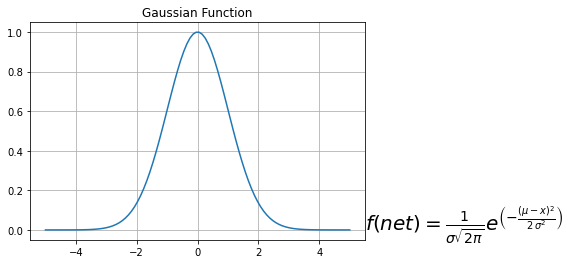

In [6]:
import pylab as plt # to plot
x = plt.linspace(-5,5,100)
mu = 0
variance = 1
sigma = np.sqrt(variance)
plt.plot(x, gaussian(x,mu,sigma))
plt.grid()
plt.title('Gaussian Function')
ltx = '$ f(net) = \\frac{1}{ \\sigma' + \
 '\\sqrt{2 \\pi}} e^{\\left(-\\frac{{\\left(\\mu - ' + \
 'x\\right)}^{2}}{2 \\, \\sigma^{2}}\\right)}$'
plt.text(5.5, 0, ltx, fontsize=20)
plt.show()

Since the distances in neighbor function are positive so we only save the positive data

In [7]:
mu = 0
rng = max(_1d,_2d)
vec = np.arange(rng)
var = np.var(vec)
sigma = np.sqrt(var)

<b>`Winner_index`:</b>
<br>This function only gives us the indecies of the winner neuron in the matrix

In [8]:
def winner_index(dot):
    argmax = (-1,-1)
    temp = -100
    for i in range(len(dot)):
        for j in range(len(dot[0])):
            if (temp < dot[i,j]):
                argmax = (i,j)
                temp = dot[i,j]
    return argmax

<b>Update function:

## $$ w_{ji}^{new} = w_{ji}^{old} + \eta(t) d(c-j,t)(X_{Si}-w_{ji}^{old}) $$

In [9]:
def update(weights, max_, input_):
    Diff_matrix = input_ - weights
    for i in range(len(weights)):
        for j in range(len(weights[0])):
            d = max(abs(i-max_[0]), abs(j-max_[1]))
            neigh = gaussian(d,mu,sigma)
            #print("was",new_weight[i,j],end=' ')
            weights[i,j] = weights[i,j] + (lr * neigh * (Diff_matrix[i,j]))
            #print("now",new_weight[i,j])
    weights = np.round(weights,decimals = 4)
    #print(weights[0])
    return weights

In [10]:
# Initializing random weight for each neuron
weight = np.round(np.random.rand(_1d, _2d, FEATURES), decimals=1)

### Optimizing Network

In [11]:
for ep in range(epoch):
    # Do this for every input from our train
    for d in X_train:
        # inner product of input d to the weight matrix
        dot = np.dot(weight,d)
        # we are looking for the max one
        max_ = winner_index(dot)
        # After finding the max one, as in theory, we update the weights 
        # regarding to change in neighbor func as we go further
        weight = update(weight, max_, d)
    # Reducing learning rate as we pass an epoch
    lr *= (1 - 1 / ((epoch-ep)+1))

In [12]:
# Final weights
weight

array([[[0.7305, 0.3445, 0.5481, 0.1861],
        [0.7285, 0.339 , 0.5566, 0.1894]],

       [[0.7527, 0.4051, 0.452 , 0.1403],
        [0.7527, 0.4051, 0.452 , 0.1403]],

       [[0.797 , 0.5249, 0.2631, 0.0513],
        [0.7906, 0.5076, 0.2915, 0.0647]]])

## TOPOGRAPHIC  MAP

In [13]:
Train_Top_Map = [[[] for x in range(_2d)] for y in range(_1d)]
Train_ct = [[[] for x in range(_2d)] for y in range(_1d)] # for grouping data indices for each neuron by their labels

In [14]:
# Checking the network with new data to see how it works
for index in range(len(X_train)):
    # initializing pivot for calculating euclidean distance
    pivot = 9999
    min_ = (-1, -1)
    for i in range(len(weight)):
        for j in range(len(weight[0])):
            dist = 0
            for k in range(len(weight[i,j])):
                # euclidean distance
                dist += pow((X_train[index][k] - weight[i, j, k]), 2)
            # If we have a lower value than before then save it
            if dist < pivot:
                min_ = (i, j)
                pivot = dist
    # Adding the data index to the nearest neuron
    Train_Top_Map[min_[0]][min_[1]].append(index)

In [15]:
print("================= Topographic Map =================")
s = [[str(e) for e in row] for row in Train_Top_Map]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))
print("===================================================")

================= Topographic Map =================
[5, 8, 9, 15, 20, 22, 23, 28, 30, 33, 35, 36, 41, 44, 51, 79, 82, 85, 87, 97, 98, 105, 109, 110, 117]                                                       	[0, 1, 3, 4, 7, 10, 12, 16, 17, 18, 19, 21, 24, 25, 26, 27, 29, 32, 37, 40, 46, 49, 50, 53, 54, 55, 56, 59, 60, 62, 64, 65, 68, 72, 73, 74, 78, 84, 86, 89, 91, 94, 96, 100, 101, 102, 103, 106, 107, 111, 112, 116, 118]
[34, 47, 99]                                                                                                                                                	[]                                                                                                                                                                                                                       
[2, 6, 11, 13, 14, 31, 38, 39, 42, 43, 45, 48, 52, 57, 58, 63, 66, 67, 69, 70, 71, 75, 76, 77, 80, 81, 83, 88, 90, 92, 93, 95, 104, 108, 113, 114, 115, 119]	[61]                                     

<b>Let's group these data indices by their labels

In [16]:
for i in range(len(Train_Top_Map)):
    for j in range(len(Train_Top_Map[i])):
        #print(splitted)
        if Train_Top_Map[i][j] != []:
            for label in (np.unique(y_train)):
                label_set = np.where(y_train == label)[0]
                c = 0
                for k in Train_Top_Map[i][j]:
                    if k in label_set:
                        c += 1
                Train_ct[i][j].append(c)

In [17]:
print("================== Accuracy Map ===================")
s = [[str(e) for e in row] for row in Train_ct]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))
print("\nFormat:")
print("[","<Class #No.> " * len(np.unique(y)),"]")
print("For example for the top left neuron:")
for i in range(len(Train_ct[0][0])):
    print("It has", Train_ct[0][0][i], "numbers of label",i)
print("===================================================")

================== Accuracy Map ===================
[0, 25, 0]	[0, 9, 44]
[0, 3, 0] 	[]        
[38, 0, 0]	[1, 0, 0] 

Format:
[ <Class #No.> <Class #No.> <Class #No.>  ]
For example for the top left neuron:
It has 0 numbers of label 0
It has 25 numbers of label 1
It has 0 numbers of label 2


## Using Test set. just out of curiosity

In [18]:
Top_Map = [[[] for x in range(_2d)] for y in range(_1d)]
ct = [[[] for x in range(_2d)] for y in range(_1d)] # for grouping data indices for each neuron by their labels

In [19]:
# Checking the network with new data to see how it works
for index in range(len(X_test)):
    # initializing pivot for calculating euclidean distance
    pivot = 9999
    min_ = (-1, -1)
    for i in range(len(weight)):
        for j in range(len(weight[0])):
            dist = 0
            for k in range(len(weight[i,j])):
                # euclidean distance
                dist += pow((X_test[index][k] - weight[i, j, k]), 2)
            # If we have a lower value than before then save it
            if dist < pivot:
                min_ = (i, j)
                pivot = dist
    # Adding the data index to the nearest neuron
    Top_Map[min_[0]][min_[1]].append(index)

In [20]:
print("================= Topographic Map =================")
s = [[str(e) for e in row] for row in Top_Map]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))
print("===================================================")

================= Topographic Map =================
[1, 7, 8, 9, 11, 12, 13, 14, 16, 21, 27, 28]	[0, 3, 5, 10, 17, 20, 24]
[]                                          	[]                       
[2, 4, 6, 15, 18, 19, 23, 25, 26, 29]       	[22]                     


Just checking how much of a class are set for a neuron to estimate how network well performed

In [21]:
for i in range(len(Top_Map)):
    for j in range(len(Top_Map[i])):
        #print(splitted)
        if Top_Map[i][j] != []:
            for label in (np.unique(y_test)):
                label_set = np.where(y_test == label)[0]
                c = 0
                for k in Top_Map[i][j]:
                    if k in label_set:
                        c += 1
                ct[i][j].append(c)

In [22]:
print("================== Accuracy Map ===================")
s = [[str(e) for e in row] for row in ct]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))
print("\nFormat:")
print("[","<Class #No.> " * len(np.unique(y)),"]")
print("For example for the top left neuron:")
for i in range(len(ct[0][0])):
    print("It has", ct[0][0][i], "numbers of label",i)
print("===================================================")

================== Accuracy Map ===================
[0, 12, 0]	[0, 1, 6]
[]        	[]       
[10, 0, 0]	[1, 0, 0]

Format:
[ <Class #No.> <Class #No.> <Class #No.>  ]
For example for the top left neuron:
It has 0 numbers of label 0
It has 12 numbers of label 1
It has 0 numbers of label 2


### Comparison to check performance

In [23]:
# Since bot Train_ct and ct have same indices we can define one to iterate in two
for i in range(len(ct)):
    for j in range(len(ct[i])):
        # [#,...,#] - [#,...,#] -> [#,...,#] - [#,...,#]
        if Train_ct[i][j] != [] and ct[i][j] != []:
            print((np.array(Train_ct[i][j]) - np.array(ct[i][j])), end = ' ')
        # [#,...,#] - [] -> [#,...,#] - [0,...,0] 
        elif Train_ct[i][j] != [] and ct[i][j] == []:
            print(np.array(Train_ct[i][j]), end = ' ')
        # [] - [#,...,#] -> [0,...0] - [#,...,#]
        elif Train_ct[i][j] == [] and ct[i][j] != []:
            print((np.full(len(np.unique(y)),0) - np.array(ct[i][j])), end = ' ')
        # [] - [] -> []
        else:
            print([],end=' ')
    print()

[ 0 13  0] [ 0  8 38] 
[0 3 0] [] 
[28  0  0] [0 0 0] 


#### `negative` values refers to misclassification based on trained model